## Assingment 4 _ INST 414

In [108]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [109]:
# Read the dateset
data = pd.read_csv('tmdb_5000_movies.csv')

In [110]:
# Checked the dataset
data.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [111]:
# Subset the data to the relevant features

movies = data[['popularity', 'budget', 'revenue', 'vote_average', 'vote_count']]


In [112]:
# Check the missing values
movies.isnull().sum()


popularity      0
budget          0
revenue         0
vote_average    0
vote_count      0
dtype: int64

In [113]:
# The process of varible standardization
scaler = StandardScaler()
movies_scaled = scaler.fit_transform(movies)

In [114]:
# The process of dimensionality reduction
pca = PCA(n_components=2)
movies_pca = pca.fit_transform(movies_scaled)

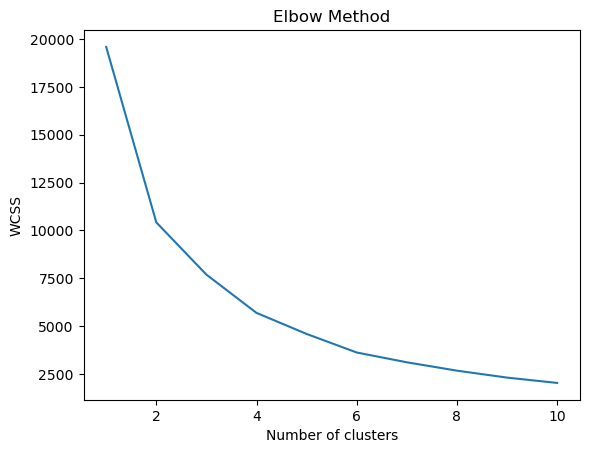

In [115]:
# Determined the K-value using Elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(movies_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [116]:
# K mean clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(movies_pca)

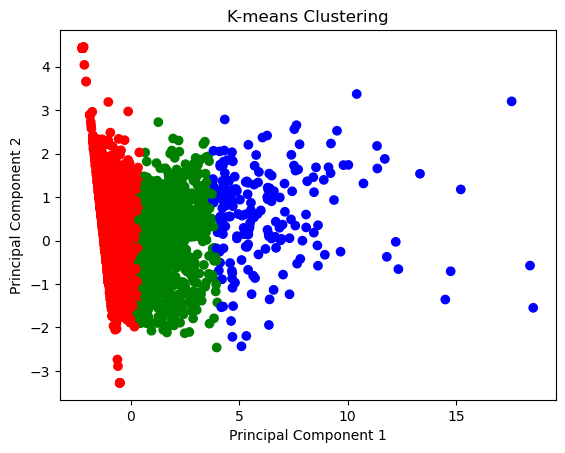

In [117]:
# Visualization of clustering
c = np.array(['red', 'blue', 'green'])
plt.scatter(movies_pca[:, 0], movies_pca[:, 1], c=c[clusters])
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [118]:
# Calculate average revenue per genre in each cluster
clustered_data = data.copy()
clustered_data['cluster'] = clusters
clustered_data['revenue'] = pd.to_numeric(clustered_data['revenue'], errors='coerce')
clustered_data = clustered_data.groupby(['cluster', 'genres'])['revenue'].mean().reset_index()

In [119]:
# Check the genre of each cluster
for i in range(3):
    print(f"Cluster {i} genres: {clustered_data[clustered_data['cluster']==i]['genres'].unique()}")

Cluster 0 genres: ['[]' '[{"id": 10402, "name": "Music"}, {"id": 10749, "name": "Romance"}]'
 '[{"id": 10402, "name": "Music"}, {"id": 12, "name": "Adventure"}, {"id": 16, "name": "Animation"}, {"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}]'
 '[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]'
 '[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 10751, "name": "Family"}]'
 '[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 35, "name": "Comedy"}]'
 '[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 80, "name": "Crime"}, {"id": 10749, "name": "Romance"}]'
 '[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}]'
 '[{"id": 10402, "name": "Music"}, {"id": 27, "name": "Horror"}]'
 '[{"id": 10402, "name": "Music"}, {"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]'
 '[{"id": 10402, "name": "Music"}, {"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, 

In [120]:
action_revenue = clustered_data[clustered_data['genres'].str.contains('Action')]['revenue'].mean()
thriller_revenue = clustered_data[clustered_data['genres'].str.contains('Thriller')]['revenue'].mean()

In [121]:
if action_revenue > thriller_revenue:
    print("Acton > Thrilier.")
else:
    print("Thrilier > Action.")


Acton > Thrilier.
